# Intraday Volatility and Trend Analysis of SPY for Trading

## Introduction
This project aims to explore intraday trading patterns in SPY, one of the most popular ETFs tracking the S&P500, to identify which hours show the most volatility and strongest trends. SPY is the most traded ETF in the world with $28.5 billion traded per day on average and even trades 2.6x of Apple stock (State Street). These insights can help traders make better decisions and lead to increased trading profits by timing better entries, optimizing trading windows, and avoiding choppy periods.

As an S&P500 trader myself, I've found trends to repeat through screen time on the charts. I have noticed these trends aligning with what other traders / research say online. However, this project and analyzing the data myself can confirm patterns in my own trading and allow me to explore other potential correlations or even trading edges.

Author: Eric Feng, Sawan Pandita

### 📁 Data Source & Collection
The dataset selected is a CSV consisting of SPY (S&P500 ETF) intraday market data sourced from [Databento](https://databento.com/). 
- Time Range: 05/01/2018 @ 4AM EST to 04/28/2025 @ 8PM EST
- The data is in 1 minute intervals and contains timestamps, open, high, low, close, volume, and other fields.


Databento is a company that collects and provides market data to individuals and banking companies such as Goldman Sachs / Morgan Stanely.

### ❓ Questions for SPY
1. Which hours have the highest 1-minute volatility (point range)?
2. Which hours have the highest 1-hour volatility (wick point range)?
3. Which hours have the largest moves (body point range)?
4. Which hours have the strongest trends?
5. What is the probability of an hourly candle closing green (bullish) or red (bearish) at each hour of the trading day?
6. What is the average point size of green vs red candles per hour?
7. What is the expected gain per hour?
8. How often do overnight (RTH) gaps appear?
9. How often do overnight (RTH) gaps get filled?
10. How does Monday's performance correlate with the rest of the week?
11. What is the intraday momentum pattern (average returns in consecutive hours)?
12. How do volume patterns vary throughout the trading day?
13. What is the correlation between morning and afternoon performance?
14. How do weekday patterns affect intraday performance?
15. What is the mean reversion tendency of price action?
16. How do first hour trading patterns affect the rest of the day?
17. What are the end-of-day momentum patterns?
18. What are the seasonal patterns in monthly returns?

### 📚 Resources
- https://www.tradingview.com/ - Charting for trading & investing
- https://finance.yahoo.com/quote/SPY/ - SPY data
- https://www.ssga.com/us/en/intermediary/capabilities/spdr-core-equity-etfs/spy-sp-500? - Official SPY ETF Page from State Street Global Advisors
- https://www.ssga.com/us/en/intermediary/etfs/spdr-sp-500-etf-trust-spy - Detailed SPY information
- https://databento.com/ – Market data provider used for this project



## 📈 Exploratory Data Analysis & Visualizations
Load the data from the local SPY-1m-databento.csv file and clean data.
- Rename ts_event to timestamp and set timestamp as df index
- Convert from UTC to UTC-4 (New York Time)
- Remove columns we do not need

**The data used is 1 minute OHLC SPY data sourced by Databento, ranging from 01/01/2018 to 04/28/2025. Python and the Pandas package were extremely helpful for automating the analysis of this data.**

In [13]:
%pip install pandas
import pandas as pd
import pytz

# Read SPY 1m data downloaded from Databento
df = pd.read_csv('SPY-1m-databento.csv')

### ------------ DATA CLEANING ---------------
# Set timestamp
df['timestamp'] = pd.to_datetime(df['ts_event'], utc = True)
df.drop(columns='ts_event', inplace=True)

# Set to NY time and set timestamp as index
df['timestamp'] = df['timestamp'].dt.tz_convert('America/New_York')
df.set_index('timestamp', inplace=True)

# Drop useless columns
df.drop(columns = ['rtype', 'publisher_id', 'instrument_id'], inplace = True)

# To select a certain date
# df = df.loc['2025-04']

df.head()


819.16s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


,open,high,low,close,volume,symbol
timestamp,,,,,,
2018-05-01 04:04:00-04:00,264.57,264.57,264.57,264.57,20,SPY
2018-05-01 04:09:00-04:00,264.50,264.50,264.50,264.50,400,SPY
2018-05-01 04:10:00-04:00,264.54,264.54,264.54,264.54,2500,SPY
2018-05-01 04:17:00-04:00,264.47,264.47,264.47,264.47,1100,SPY
2018-05-01 04:25:00-04:00,264.53,264.53,264.53,264.53,300,SPY


## 1. Which hours have the highest 1 minute volatility (point range)? 
We can calculate the average 1 minute volatility in each hour by subtracting the high and low of each 1 minute candlestick. This information can be useful for scalpers that want to take many small trades. It is easier to scalp in higher volatility conditions.

The 10AM  - 11AM EST has the contains the most voltile 1 minute candles, with an average of 0.25 pts per 1 minute candle. The runner ups are the 3PM - 4PM EST candle and the 9AM - 10AM EST candle.

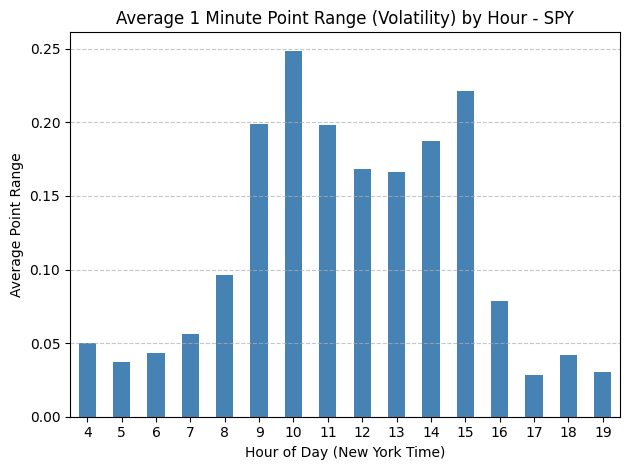

In [14]:
import matplotlib.pyplot as plt

# Calculate point range for each 1-minute bar
df['range'] = df['high'] - df['low']

# Get hour for each row from timestamp and add as column
df['hour'] = df.index.hour

# Group by hour and calculate average volatility (point range)
minute_volatility = df.groupby('hour')['range'].mean()

# minute_volatility.head(20)

# Plot the average range per hour
minute_volatility.plot(kind='bar', color='steelblue')
plt.title('Average 1 Minute Point Range (Volatility) by Hour - SPY')
plt.xlabel('Hour of Day (New York Time)')
plt.ylabel('Average Point Range')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

From the "Average 1 Minute Point Range (Volatility) by Hour - SPY" chart, we can immediately see the following order in 1 minute volatility:
1. 9AM - 10AM is most volatile with a ~0.25 point range
2. 3PM - 4PM with around ~0.22 points
3. 9AM - 10AM (market open) / 11 AM - 12 PM with around ~0.20 points

Another observation is the significantly heighented volatility during normal trading hours (9:30 AM - 4:00 PM). The point range is much higher than the extended trading hours (4AM - 9:30AM and 4PM -8PM)

Volatility means more trading opportunity. Thus, it would be advantageous for scalpers to trade (minute traders) during 9:30 AM - 4:00PM for strategies that benefit from volatility. Understanding the best times for volatility on the 1 minute range can benefit high frequency traders or trading bots/algorithms take many small trades.

## 2. Which hours have the highest 1 hour volatility (wick point range)? 
This measures the 1 hour range of every candle in the trading day by using
- range = high - low

The visualization shows where the largest price swings and when the highest volatility times are through the day.

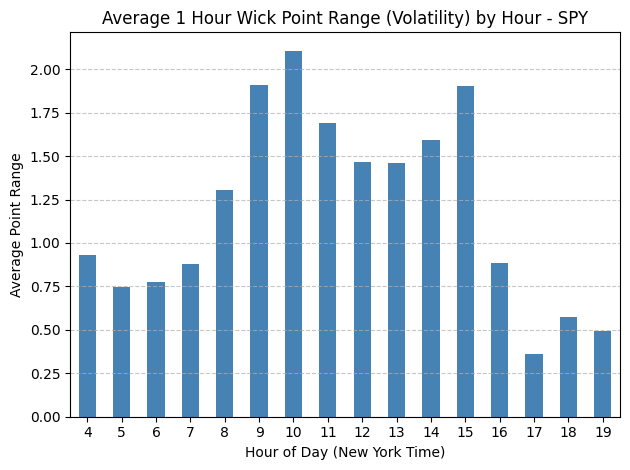

In [16]:
# Aggregate 1m candles into 1 Hour candles
hourly = df[['open', 'high', 'low', 'close']].resample('1h').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last'
})

# remove invalid values
hourly.dropna(inplace=True)

# Calculate range of each hour
hourly['range'] = hourly['high'] - hourly['low']

# Add the corresponding hour as a column
hourly['hour'] = hourly.index.hour

hourly_ranges = hourly.groupby('hour')['range'].mean()

# plot
hourly_ranges.plot(kind='bar', color='steelblue')
plt.title('Average 1 Hour Wick Point Range (Volatility) by Hour - SPY')
plt.xlabel('Hour of Day (New York Time)')
plt.ylabel('Average Point Range')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The 1 hour time frame is often used in day trading to interpret potential for large moves. Traders looking to hold trades anywhere from 10 minutes to a few hours should keep the hourly candles in mind.

The market hours is observed to also have heightened volatility on the 1 hour range. 

The best trading times for highested volatility:
1. 10AM - 11AM
2. 9AM - 10AM / 3PM - 4PM
3. 11AM - 12PM

In extended trading hours, the average point range shows that there is still opportunity, but not as much as normla market hours. Additionally the early morning premarket (4AM - 9:30AM) trading hours show more volatility than the evening hours (4PM - 8PM). This is likely due to the overlap of premarket session, London session (3AM - 11AM), and New York Foreign Exchange Session open (8AM). It is also observed that there is a significant dip in volatility during 5PM - 6PM, which correlates with the 1 hour window the futures market closes everyday for the S&P500.

This information can be extremely helpful retail/individual traders, who may look to take 1-2 trades during the most time of day with most trading opportunity.

### 3. Which hours have the largest moves (body point range)?
We'll calculate this by using:
- candle body = | open - close |

The candle body tells measures the strength and size of a move in eithe direction on average, allowing traders to capatilize on trend following or momentum based strategies.

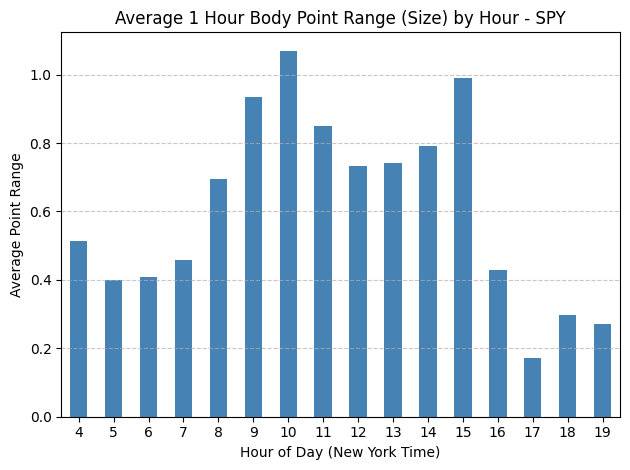

In [17]:
hourly['body'] = abs(hourly['open'] - hourly['close'])

hourly_body = hourly.groupby('hour')['body'].mean()

# plot
hourly_body.plot(kind='bar', color='steelblue')
plt.title('Average 1 Hour Body Point Range (Size) by Hour - SPY')
plt.xlabel('Hour of Day (New York Time)')
plt.ylabel('Average Point Range')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

When traders look to catch trends, the candle body typically encompasses a large portion of a trade. A large candle body typically represents a strong trend with small pullbacks and little drawdown. Environments with large body point ranges (thick candles) would be ideal for trend/momentum traders.

We can see the largest candle bodies are:
1. 10AM - 11AM EST
2. 3PM - 4PM
3. 9AM - 10AM

The best times to catch a trend are right after market open and immediately before market close. Traders looking to catch trends or large moves should look for opportunities within 10AM - 11AM and 3PM-4PM to catch significant moves.

### 4. Which hours have the strongest trends? 
Trend Strength Ratio = Size of Body / Size of Candle Range

Chop Ratio = Size of Candle Range / Size of Body

For momentum and trend traders, it can be useful to determine which hours have the best trends, as well as knowing which hours are likely to have the most consolidation. By avoiding consolidation and catching  trends, bigger profits can be made.

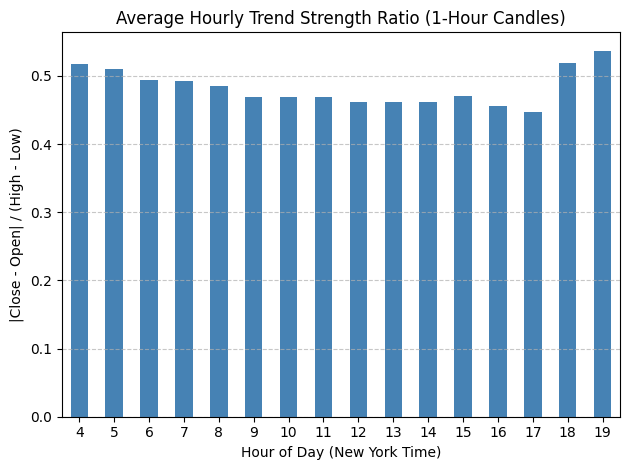

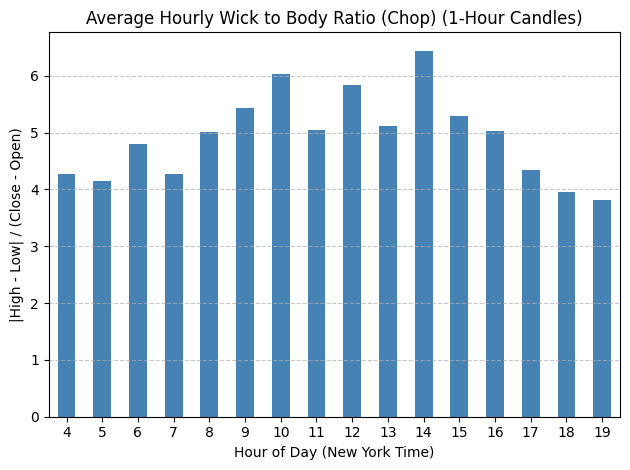

In [19]:
# Trend Strength = Size of Body / Size of Candle (Top and bottom of wicks)


# Only include NY session Data
# hourly = hourly.between_time('09:00', '16:00')

temp = hourly.copy()

# avoid divide-by-zero
temp = temp[temp['range'] != 0]
temp = temp[temp['body'] != 0]

temp['trend_strength'] = temp['body'] / temp['range']

hourly_trend_strength = temp.groupby('hour')['trend_strength'].mean()


# Create plot
hourly_trend_strength.plot(kind='bar', color='steelblue')


plt.title('Average Hourly Trend Strength Ratio (1-Hour Candles)')
plt.xlabel('Hour of Day (New York Time)')
plt.ylabel('|Close - Open| / (High - Low)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate Chop
temp['chop'] = temp['range'] / temp ['body']

hourly_chop = temp.groupby('hour')['chop'].mean()

hourly_chop.plot(kind='bar', color='steelblue')
plt.title('Average Hourly Wick to Body Ratio (Chop) (1-Hour Candles)')
plt.xlabel('Hour of Day (New York Time)')
plt.ylabel('|High - Low| / (Close - Open)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



The average hourly trend strength ratio is suprisingly similar for all hours. From the trend strength and chop graph, it is found that market hours seem to provide worse (chop) trading candles on the 1 hour. At a first glance, this does not make sense. The best trends and opportunity intuitively should be during the market hours. 

However, trend strength does not take into account of the size of the candle and the opportunity within. This graph simply states that when these candles form, the body to wick ratio have a similar structure. However, we found earlier the market hours tend to have larger candles and large volatility ranges, which leads to more opportunity. 

This means that the time only has a minor impact on the shape of candles, with candles within the market hours showing higher chop and lower strength ratios. 

One key takeaway from this graph is that although the ranges and volatility are lower for extended trading hours, there is actually slightly edge in catching trends during the extended trading hours with slightly more stable 1 hour candles. Thus, it is worth investigating a strategy trading on a large size during extended trading hours with the goal of catching a smoother trend with less drawdown within the trade.

### 5. What is the probability of an hourly candle closing green (bullish) or red (bearish) at each hour of the trading day?

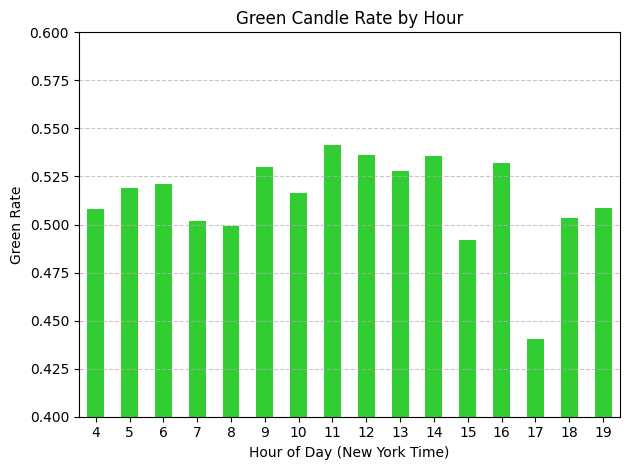

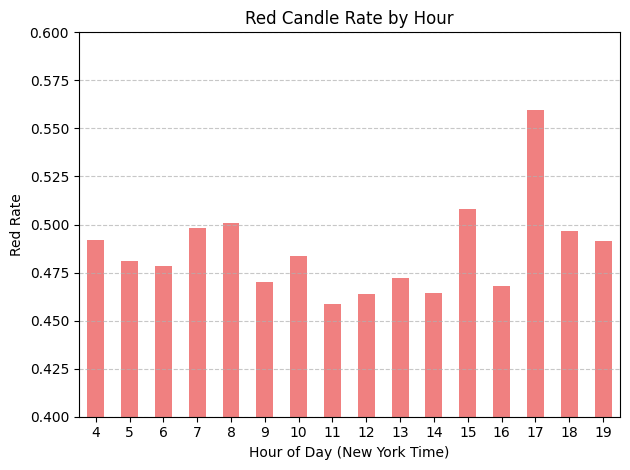

,Green Count,Red Count,Green Rate (%),Red Rate (%)
hour,,,,
4,893,865,50.80,49.20
5,911,845,51.88,48.12
6,916,841,52.13,47.87
7,882,876,50.17,49.83
8,878,880,49.94,50.06
9,932,826,53.01,46.99
10,908,850,51.65,48.35
11,952,806,54.15,45.85
12,943,815,53.64,46.36


In [20]:
# Add a color column depending on the candle close
hourly['color'] = hourly.apply(lambda row: 'green' if row['close'] > row['open'] else 'red', axis=1)

# Count number of green and red candles for each hour
hourly_color_counts = hourly.groupby(['hour', 'color']).size().unstack(fill_value=0)

hourly_color_counts['green_rate'] = hourly_color_counts['green'] / (hourly_color_counts['green'] + hourly_color_counts['red'])
hourly_color_counts['red_rate'] = hourly_color_counts['red'] / (hourly_color_counts['green'] + hourly_color_counts['red'])

hourly_color_counts.head(20)

# Green candle close chart
hourly_color_counts['green_rate'].plot(kind='bar', color='limegreen')
plt.title('Green Candle Rate by Hour')
plt.xlabel('Hour of Day (New York Time)')
plt.ylabel('Green Rate')
plt.ylim(0.4, 0.6)  # Zoom in to highlight variation
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Red candle close chart
hourly_color_counts['red_rate'].plot(kind='bar', color='lightcoral')
plt.title('Red Candle Rate by Hour')
plt.xlabel('Hour of Day (New York Time)')
plt.ylabel('Red Rate')
plt.ylim(0.4, 0.6)  # Zoom in to highlight variation
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

from IPython.display import display

# Format table as %
hourly_table = hourly_color_counts.copy()
hourly_table['green_rate'] = (hourly_table['green_rate'] * 100).round(2)
hourly_table['red_rate'] = (hourly_table['red_rate'] * 100).round(2)

# Rename table columns
hourly_table.columns = ['Green Count', 'Red Count', 'Green Rate (%)', 'Red Rate (%)']

display(hourly_table.sort_index())


 Overall, there is slight edge in green 1 hour candles being formed. With the SPY increasing from 2018 to 2025, this makes sense. There may be a slight advantage to being in a buy position during trades, but it is still important to consider in the point size of the candle.

 An interesting anomaly is the 5PM - 6 PM hour as it has the largest red rate at 55.94%. This is likely due to a drop in trading volume after the market hours and with the futures market being closed. There may be an edge within this time frame. 

### 6. What is the average point size of green vs red candles per hour?

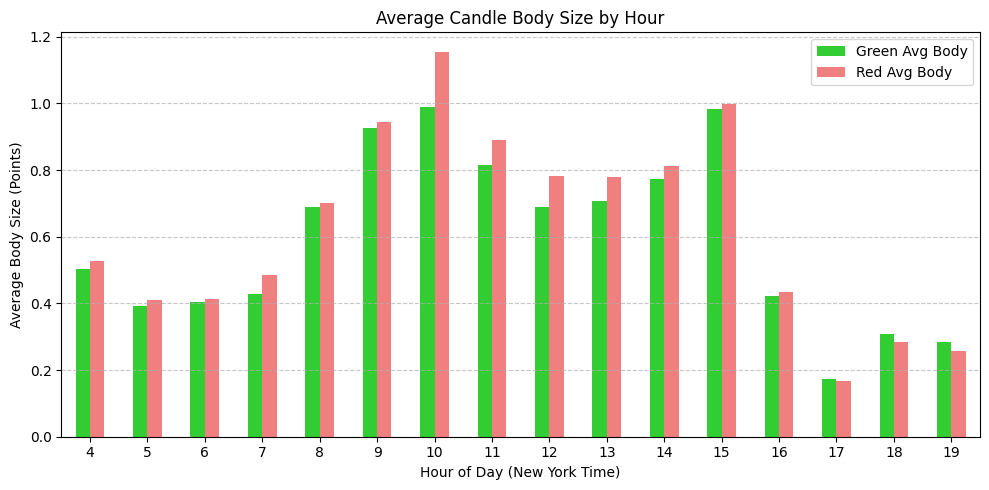

,Green Avg Body,Red Avg Body
hour,,
4,0.502206,0.527457
5,0.393172,0.409728
6,0.403319,0.412283
7,0.429580,0.484178
8,0.690000,0.700080
9,0.927484,0.944050
10,0.990413,1.155388
11,0.815294,0.888939
12,0.688849,0.782215


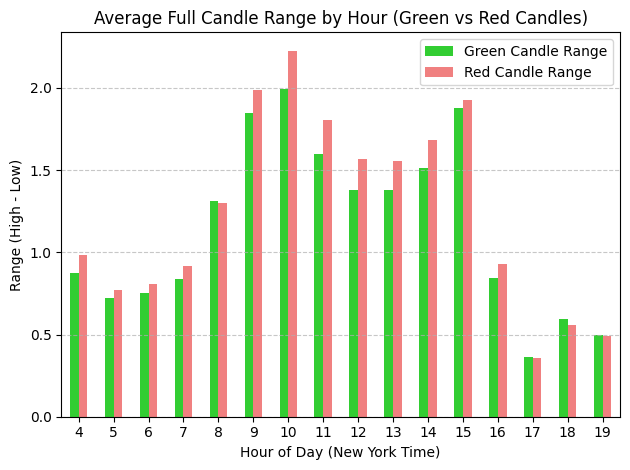

,Green > Red,Count
0,False,13
1,True,3


In [21]:
# Filter green and red candles
green_1hr_candles = hourly[hourly['color'] == 'green'].copy()
red_1hr_candles = hourly[hourly['color'] == 'red'].copy()

# Group and get average body size
green_1hr_body_avg = green_1hr_candles.groupby('hour')['body'].mean()
red_1hr_body_avg = red_1hr_candles.groupby('hour')['body'].mean()

avg_1hr_body_by_color = pd.DataFrame({
    'Green Avg Body': green_1hr_body_avg,
    'Red Avg Body': red_1hr_body_avg
})

avg_1hr_body_by_color.plot(kind='bar', figsize=(10, 5), color=['limegreen', 'lightcoral'])
plt.title('Average Candle Body Size by Hour')
plt.xlabel('Hour of Day (New York Time)')
plt.ylabel('Average Body Size (Points)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
# avg_1hr_body_by_color.head(20)
display(avg_1hr_body_by_color)

# -------------- CALCULATE WICK CANDLES POINT RANGES---------------

# Add full range column if not done already
hourly['range'] = hourly['high'] - hourly['low']

# Filter by green and red candles
green_candles = hourly[hourly['color'] == 'green']
red_candles = hourly[hourly['color'] == 'red']

# Group by hour and calculate average full range
green_range = green_candles.groupby('hour')['range'].mean()
red_range = red_candles.groupby('hour')['range'].mean()

# Combine into one DataFrame
avg_range_by_color = pd.DataFrame({
    'Green Candle Range': green_range,
    'Red Candle Range': red_range
})

avg_range_by_color.plot(kind='bar', color=['limegreen', 'lightcoral'])
plt.title('Average Full Candle Range by Hour (Green vs Red Candles)')
plt.xlabel('Hour of Day (New York Time)')
plt.ylabel('Range (High - Low)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# -------------- CALCULATE # OF RED AND GREEN HOURS ---------------

avg_1hr_body_by_color['Dominant Side'] = avg_1hr_body_by_color.apply(
    lambda row: 'Green' if row['Green Avg Body'] > row['Red Avg Body'] else 'Red', axis=1
)

avg_1hr_body_by_color['Green > Red'] = avg_1hr_body_by_color['Green Avg Body'] > avg_1hr_body_by_color['Red Avg Body']
dominance_summary = avg_1hr_body_by_color['Green > Red'].value_counts()
dominance_summary_df = dominance_summary.reset_index()
dominance_summary_df.columns = ['Green > Red', 'Count']

display(dominance_summary_df)



The range of red candles is slightly larger than the range of green candles when present. This supports the fact that down moves are faster than up moves, and supports the idea of crashes from fear/panic and stability during times of gain.

It is also observed that downward volatility is more present early after market open.

Additionally, volatility in both green and red candles ranges are highest at 10AM.

### 7. What is the expceted gain per hour?

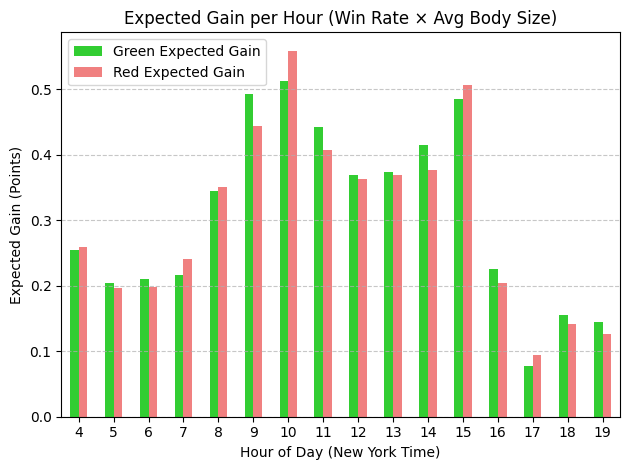

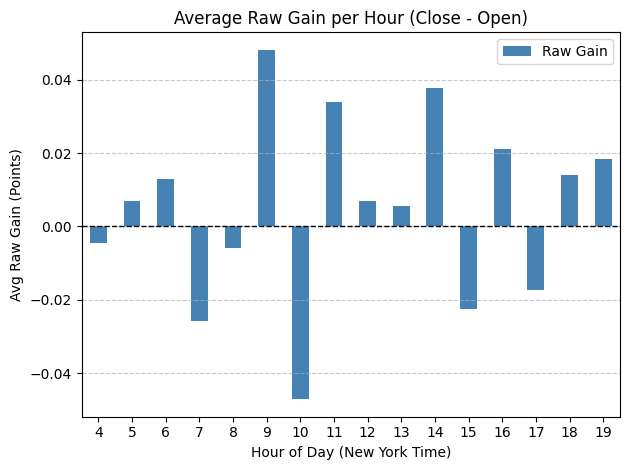

,Raw Gain
hour,
4,-0.0044
5,0.0068
6,0.0129
7,-0.0257
8,-0.0058
9,0.0481
10,-0.0471
11,0.0339
12,0.0069


In [22]:

# -------------- CALCULATE EXPECTED GAIN PER HOUR BY COLOR---------------
expected = avg_1hr_body_by_color.copy()

# Get win rates from hourly_color_counts
expected['Green Win Rate'] = hourly_color_counts['green_rate']
expected['Red Win Rate'] = hourly_color_counts['red_rate']

# Calculate expected gain
expected['Green Expected Gain'] = expected['Green Win Rate'] * expected['Green Avg Body']
expected['Red Expected Gain'] = expected['Red Win Rate'] * expected['Red Avg Body']

expected[['Green Expected Gain', 'Red Expected Gain']].plot(kind='bar', color=['limegreen', 'lightcoral'])

plt.title('Expected Gain per Hour (Win Rate × Avg Body Size)')
plt.xlabel('Hour of Day (New York Time)')
plt.ylabel('Expected Gain (Points)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# -------------- CALCULATE EXPECTED RAW GAIN PER HOUR -------------------
hourly['raw_gain'] = hourly['close'] - hourly['open']

# Group by hour and calculate average raw gain
raw_gain_by_hour = hourly.groupby('hour')['raw_gain'].mean()

raw_gain_df = pd.DataFrame({'Raw Gain': raw_gain_by_hour})

raw_gain_df.plot(kind='bar', color='steelblue')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.title('Average Raw Gain per Hour (Close - Open)')
plt.xlabel('Hour of Day (New York Time)')
plt.ylabel('Avg Raw Gain (Points)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

raw_gain_df_rounded = raw_gain_df.round(4)
display(raw_gain_df_rounded)

The highest green expected gain is during 9AM - 10AM and around 2PM - 3 PM and the highest red expected gain is 10AM - 11AM. This means on average, the market goes up immediately after open and drops around 10AM - 11AM. Opportunities to trade a long position can be good around market open, and short opportunities can be good at around 10AM. 

3PM - 4PM offers a good directional move in both directions.

This also means investors looking to buy cheap prices should buy during 10AM - 11AM when the market dips

### 8. How often do overnight (RTH) gaps appear?

Gaps in SPY occur when there is a difference between the 4PM close and 9:30AM. Because the gap "ignores" the extended trading hours price, the market "gaps" coming into the 9:30AM open.

SPY chart with gaps:
![Gap Fill Chart](images/gaps.png)

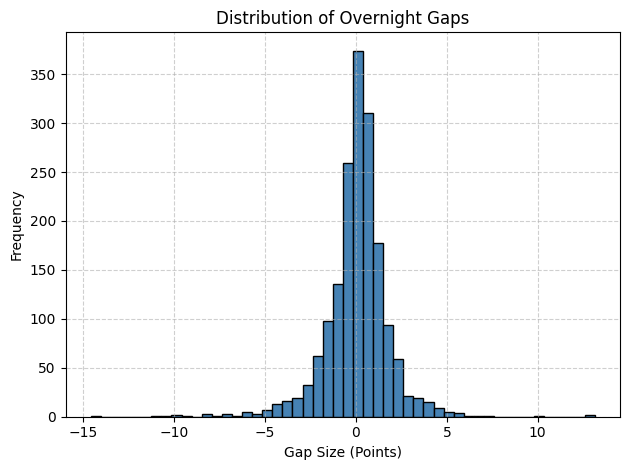

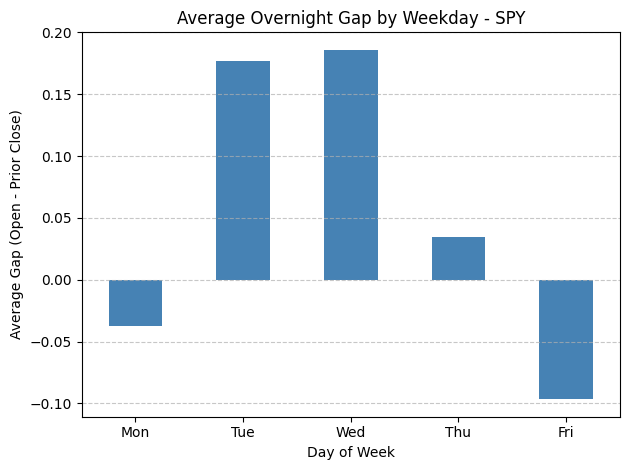

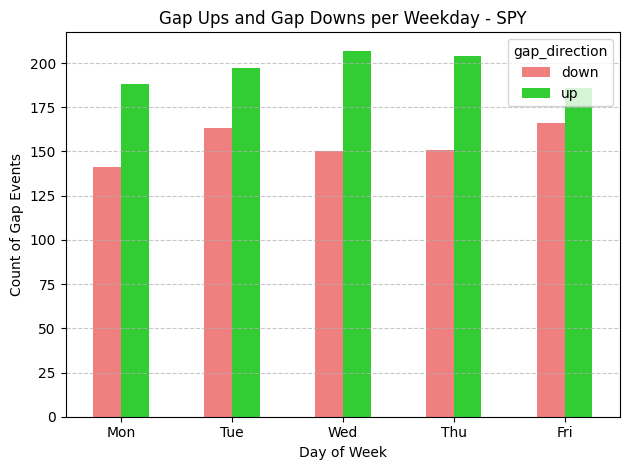

,Count,Percent
gap_direction,,
up,982,55.86
down,771,43.86
flat,5,0.28


In [23]:
# First, resample to daily data for Open and Close
daily = df.resample('1D').agg({
    'open': 'first',
    'close': 'last'
})

# Get rid of missing days
daily.dropna(inplace=True)

# Calculate overnight gap as today's open minus yesterday's close
daily['overnight_gap'] = daily['open'] - daily['close'].shift(1)
# daily.dropna(subset=['overnight_gap'], inplace=True)

daily['gap_direction'] = daily['overnight_gap'].apply(lambda x: 'up' if x > 0 else 'down' if x < 0 else 'flat')

daily[['overnight_gap', 'gap_direction']].head(20)

plt.figure()
plt.hist(daily['overnight_gap'], bins=50, color='steelblue', edgecolor='black')
plt.title('Distribution of Overnight Gaps')
plt.xlabel('Gap Size (Points)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


daily['weekday'] = daily.index.weekday
avg_gap_by_day = daily.groupby('weekday')['overnight_gap'].mean()
avg_gap_by_day.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'][:len(avg_gap_by_day)]

# Plot average gaps
avg_gap_by_day.plot(kind='bar', color='steelblue')
plt.title('Average Overnight Gap by Weekday - SPY')
plt.xlabel('Day of Week')
plt.ylabel('Average Gap (Open - Prior Close)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Direction and weekday columns
daily['gap_direction'] = daily['overnight_gap'].apply(lambda x: 'up' if x > 0 else 'down' if x < 0 else 'flat')

# Count gap ups and downs by weekday
gap_counts = daily[daily['gap_direction'].isin(['up', 'down'])] \
    .groupby(['weekday', 'gap_direction']).size().unstack(fill_value=0)

gap_counts.index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri']

# Plot gap up and downs by Weekday
gap_counts.plot(kind='bar', color=['lightcoral', 'limegreen'])
plt.title('Gap Ups and Gap Downs per Weekday - SPY')
plt.xlabel('Day of Week')
plt.ylabel('Count of Gap Events')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

gap_summary = daily['gap_direction'].value_counts()
gap_percent = gap_summary / gap_summary.sum() * 100

# Gap up or down rate by weekday
gap_analysis = pd.DataFrame({
    'Count': gap_summary,
    'Percent': gap_percent.round(2)
})

display(gap_analysis)


The distribution of gaps is centered around 0. Gaps are common and are usually small.

Tuesday and Wednesday have the highest potential for bullish overnight gaps, and Friday has tends to have average gaps down.

Gaps tend to bem more bullish at 55.86%, meaning overnight trading for S&P500 tends to be slightly bullish.

### 9. How often do overnight (RTH) gaps get filled?
RTH gap fills are a strategy used by many traders. The rate of a gap fill itself can be an edge. A gap is consider filled if it is filled the same day it is formed.

,Weekday,Average Fill Rate
0,Monday,0.513678
1,Tuesday,0.617729
2,Wednesday,0.628492
3,Thursday,0.588732
4,Friday,0.542373


gap_direction,Gap Down Fill Rate,Gap Up Fill Rate
weekday,,
Monday,0.567568,0.469613
Tuesday,0.611465,0.622549
Wednesday,0.673469,0.597156
Thursday,0.600000,0.580000
Friday,0.562874,0.524064


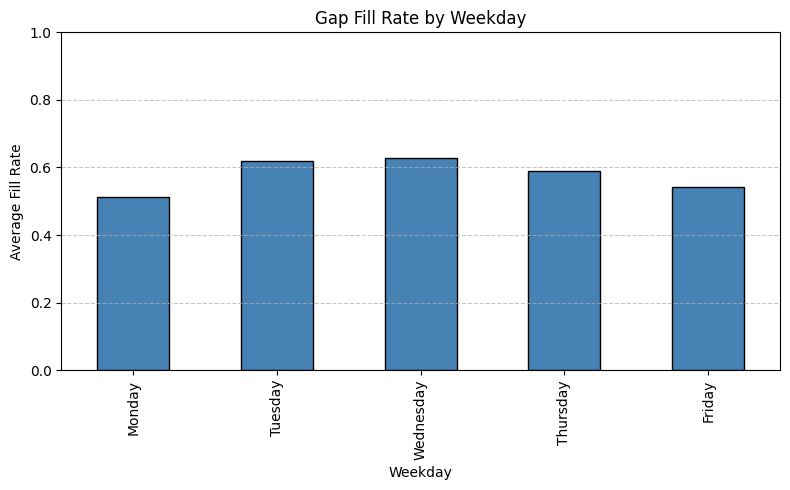

In [24]:
df_copy = df.copy()

# df_copy = df_copy.loc['2018-01-01':'2025-04-01']

df_copy = df_copy.between_time('09:30', '16:00')

df_copy['date'] = df_copy.index.date

df_copy['timestamp'] = df_copy.index

#reate daily bars from intraday data
daily_prev = df_copy.groupby('date').agg({
    'open': 'first',
    'close': 'last'
}).reset_index()


#Add previous close
daily_prev['prev_close'] = daily_prev['close'].shift(1)

# Rename daily open to avoid column conflict
daily_prev.rename(columns={'open': 'daily_open'}, inplace=True)

daily_prev.head()


# Merge daily open and prev_close into the intraday data for easy comparison
intraday = df_copy.merge(
    daily_prev[['date', 'daily_open', 'prev_close']],
    on='date',
    how='left'
)

# set timestamp as index again
intraday.set_index('timestamp', inplace=True)

# REMOVE FIRST DAY
intraday = intraday.dropna(subset=['prev_close'])

intraday.head()

# Step 6: Calculate overnight gap
intraday['gap'] = intraday['daily_open'] - intraday['prev_close']
intraday['gap_direction'] = intraday['gap'].apply(lambda x: 'up' if x > 0 else 'down' if x < 0 else 'flat')
intraday.head(10000)

gap_fills = []

for date, group in intraday.groupby('date'):
    prev_close = group['prev_close'].iloc[0]
    open_price = group['daily_open'].iloc[0]
    day_high = group['high'].max()
    day_low = group['low'].min()

    # Fully filled means the price traded back to previous close
    if open_price > prev_close:  # gap up → needs to go down to prev_close
        filled = prev_close >= day_low
    elif open_price < prev_close:  # gap down → needs to go up to prev_close
        filled = prev_close <= day_high
    else:
        filled = False  # flat gap

    gap_fills.append({
        'date': date,
        'gap': open_price - prev_close,
        'gap_direction': 'up' if open_price > prev_close else 'down' if open_price < prev_close else 'flat',
        'filled': filled
    })

# Convert to DataFrame
gap_fill_df = pd.DataFrame(gap_fills)

# gap_fill_df.to_csv("gap_fill_results.csv")

# Add weekday to your gap_fill_df
gap_fill_df['weekday'] = pd.to_datetime(gap_fill_df['date']).dt.day_name()

# Calculate the average fill rate per weekday
weekday_fill_stats = gap_fill_df.groupby('weekday')['filled'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'
])

# Convert to DataFrame for cleaner display
weekday_fill_df = weekday_fill_stats.reset_index()
weekday_fill_df.columns = ['Weekday', 'Average Fill Rate']

display(weekday_fill_df)

weekday_gap_fill = (
    gap_fill_df
    .groupby(['weekday', 'gap_direction'])['filled']
    .mean()
    .unstack()
    .reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
    .rename(columns={'up': 'Gap Up Fill Rate', 'down': 'Gap Down Fill Rate'})
)

# Display the table
display(weekday_gap_fill)

# 
plt.figure(figsize=(8, 5))
weekday_fill_stats.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Gap Fill Rate by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Fill Rate')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 10. How does Monday's performance correlate with the rest of the week?

4234.60s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


4240.69s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
## Question 1: How does Monday's performance correlate with the rest of the week?


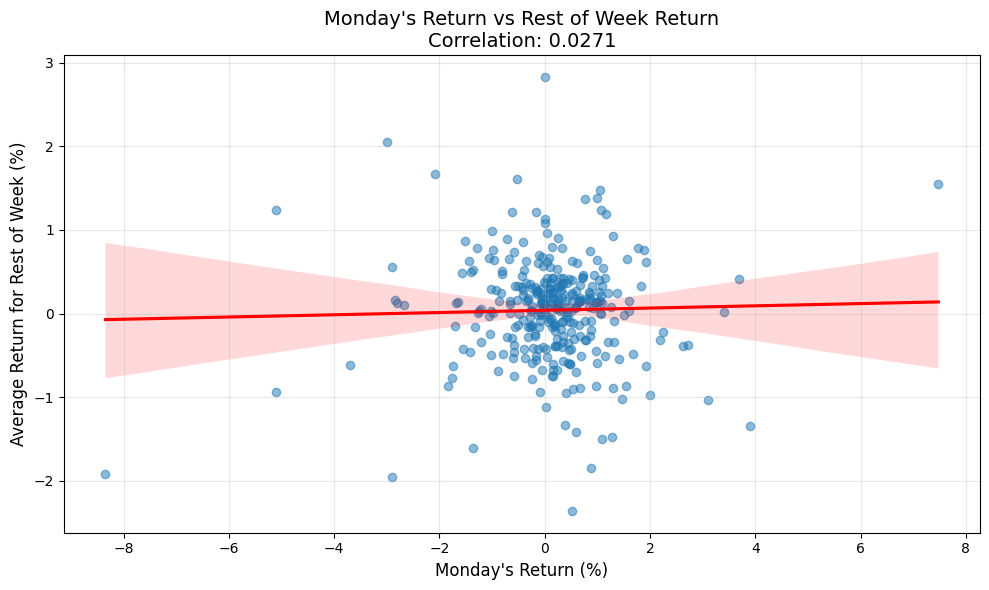


Conditional Probability Analysis:
week_direction    Bearish  Bullish
monday_direction                  
Bearish             39.23    60.77
Bullish             41.62    58.38


In [50]:
import pandas as pd
import numpy as np
%pip install matplotlib
import matplotlib.pyplot as plt
%pip install seaborn
import seaborn as sns
from datetime import time
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import warnings
warnings.filterwarnings('ignore')


# here I am creating a copy of the dataframe for analysis
spy_df = df.copy()


print("## Question 1: How does Monday's performance correlate with the rest of the week?")

# then I would create weekday column
spy_df['weekday'] = spy_df.index.day_name()

# Group by date to get daily data
daily_df = spy_df.resample('D').agg({
    'open': 'first',
    'high': 'max',
    'low': 'min',
    'close': 'last',
    'volume': 'sum'
}).dropna()

daily_df['weekday'] = daily_df.index.day_name()
daily_df['return'] = daily_df['close'].pct_change() * 100  # Daily returns in percentage

# here I am going to filter for just trading days (Monday to Friday)
trading_days = daily_df[daily_df['weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

# Get Monday data
mondays = trading_days[trading_days['weekday'] == 'Monday']
mondays['week_number'] = mondays.index.isocalendar().week
mondays['year'] = mondays.index.year
mondays['week_id'] = mondays['year'].astype(str) + "-" + mondays['week_number'].astype(str)

# then I will get rest of week data and calculate average return
rest_of_week = trading_days[trading_days['weekday'] != 'Monday']
rest_of_week['week_number'] = rest_of_week.index.isocalendar().week
rest_of_week['year'] = rest_of_week.index.year
rest_of_week['week_id'] = rest_of_week['year'].astype(str) + "-" + rest_of_week['week_number'].astype(str)

# after which I would need to group rest of week by week_id and calculate average return
rest_of_week_avg = rest_of_week.groupby('week_id')['return'].mean().reset_index()
rest_of_week_avg = rest_of_week_avg.rename(columns={'return': 'rest_of_week_return'})

# then merge Monday data with rest of week data
monday_vs_week = pd.merge(
    mondays[['return', 'week_id']], 
    rest_of_week_avg, 
    on='week_id'
).dropna()

monday_vs_week = monday_vs_week.rename(columns={'return': 'monday_return'})

# here lastly I will calculate correlation
correlation = monday_vs_week['monday_return'].corr(monday_vs_week['rest_of_week_return'])

# then I would need to create plot to showcase the results
plt.figure(figsize=(10, 6))
sns.regplot(x='monday_return', y='rest_of_week_return', data=monday_vs_week, 
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title(f"Monday's Return vs Rest of Week Return\nCorrelation: {correlation:.4f}", fontsize=14)
plt.xlabel("Monday's Return (%)", fontsize=12)
plt.ylabel("Average Return for Rest of Week (%)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# then I would create classification table for more insights
monday_vs_week['monday_direction'] = np.where(monday_vs_week['monday_return'] > 0, 'Bullish', 'Bearish')
monday_vs_week['week_direction'] = np.where(monday_vs_week['rest_of_week_return'] > 0, 'Bullish', 'Bearish')

# next I would cross tabulation
direction_table = pd.crosstab(monday_vs_week['monday_direction'], 
                             monday_vs_week['week_direction'],
                             normalize='index') * 100

print("\nConditional Probability Analysis:")
print(direction_table.round(2))

Wednesdays have the highest gap fill rates at around 62.8%, and the gap fill rate is above 51% for every single day. Mondays have the lowest gap fill rate.

Takeaways:
- Tuesday, Wednesday, and Thursdays are the most statistically reliable days for gap fill trades, especially gap downs
- Traders should be wary of Monday and Friday gap fills, especially  Monday gap fill ups with only 46.9% success rates
- By combining a positive risk to reward with a 50-60% gap fill rate and a good entry, a strategy/edge can successfully be built around gap fills

### 11. What is the intraday momentum pattern (average returns in consecutive hours)?
This analysis examines how previous hour performance affects the following hour's returns. By analyzing the relationship between consecutive hours, we can identify if momentum or mean reversion tendencies exist within the trading day. This is valuable for traders who want to know if an up-move is likely to continue in the next hour or reverse. The code calculates average returns following bullish vs bearish hours throughout the day, helping to identify the strongest momentum and reversal periods.

<Figure size 1200x600 with 0 Axes>

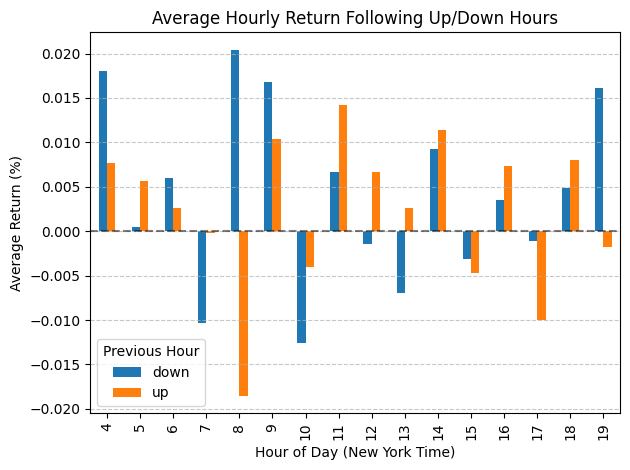

prev_hour_direction,down,up
hour,,
4,0.018,0.008
5,0.001,0.006
6,0.006,0.003
7,-0.010,-0.000
8,0.020,-0.019
9,0.017,0.010
10,-0.013,-0.004
11,0.007,0.014
12,-0.001,0.007


In [31]:
# firstly I would calculate hourly returns
hourly['hourly_return'] = hourly['close'].pct_change() * 100
hourly.dropna(inplace=True)

# then I would add previous hour's return as a feature
hourly['prev_hour_return'] = hourly['hourly_return'].shift(1)
hourly.dropna(inplace=True)

# by which I would need to group by previous hour's return direction
hourly['prev_hour_direction'] = hourly['prev_hour_return'].apply(
    lambda x: 'up' if x > 0 else 'down')

# then it would be necessary to calculate average next hour return grouped by previous hour direction
momentum_effect = hourly.groupby(['hour', 'prev_hour_direction'])['hourly_return'].mean().unstack()

# this should plot the results
plt.figure(figsize=(12, 6))
momentum_effect.plot(kind='bar')
plt.title('Average Hourly Return Following Up/Down Hours')
plt.xlabel('Hour of Day (New York Time)')
plt.ylabel('Average Return (%)')
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Previous Hour')
plt.tight_layout()
plt.show()

# here I would need to display the numerics and this would display numeric results
display(momentum_effect.round(3))

### 12. How do volume patterns vary throughout the trading day?
Volume is a critical indicator of market participation and can signal the significance of price moves. This analysis shows which hours have the highest trading volume both in absolute terms and as a percentage of the day's total volume. Understanding volume patterns helps traders identify when the market is most liquid and when major participants are most active. High volume periods often coincide with institutional order flow, while knowing low volume periods helps avoid times when spreads may widen and slippage increases.

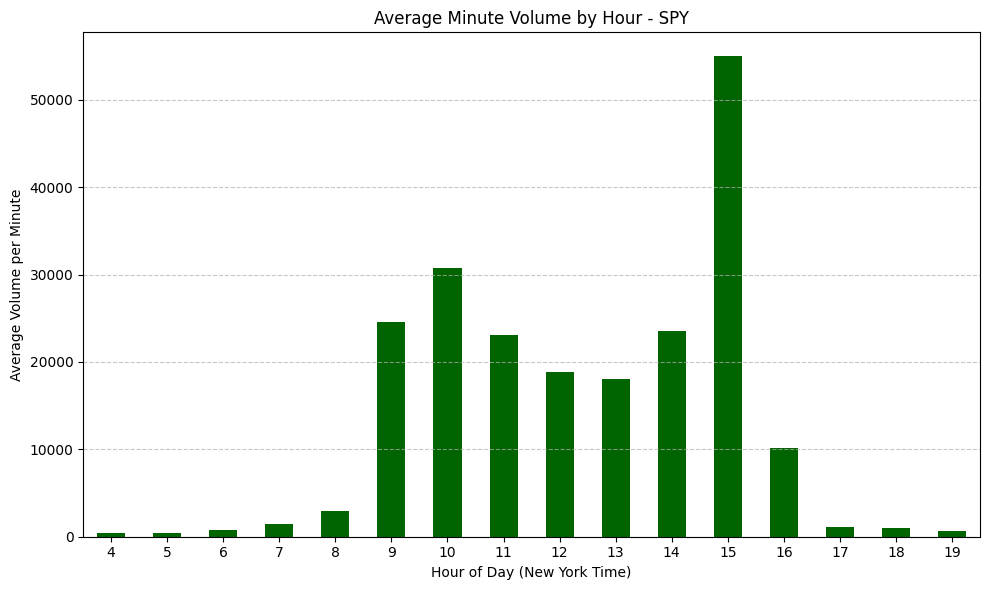

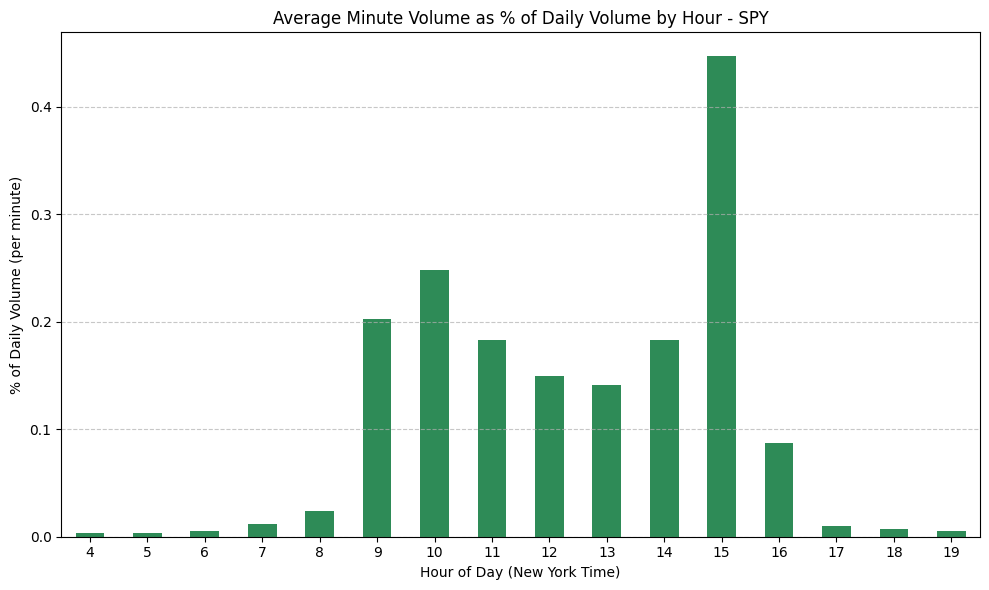

In [37]:
import pandas as pd
import matplotlib.pyplot as plt


df['hour'] = df.index.hour

# her I would calculate average volume per minute by hour
volume_by_hour = df.groupby('hour')['volume'].mean()

# then I would plot average volume by hour
plt.figure(figsize=(10, 6))
volume_by_hour.plot(kind='bar', color='darkgreen')
plt.title('Average Minute Volume by Hour - SPY')
plt.xlabel('Hour of Day (New York Time)')
plt.ylabel('Average Volume per Minute')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# after I would need to calculate hourly volume as percentage of daily volume
daily_volume = df.resample('1D')['volume'].sum()

# then convert the index to a column for merging
daily_volume = daily_volume.rename('daily_volume').reset_index()

# here I would need to ensure the 'date' column in df is of the same type as the index in daily_volume
df['date'] = pd.to_datetime(df.index.date).tz_localize('America/New_York')

# lastly I would merge the DataFrames
df_with_daily = df.merge(
    daily_volume,
    left_on='date',
    right_on=daily_volume.columns[0],  # Dynamically use the correct column name
    how='left'
)

# then calculate volume percentage
df_with_daily['volume_pct'] = (df_with_daily['volume'] / df_with_daily['daily_volume']) * 100

# here I would need to group by hour and calculate mean percentage
volume_pct_by_hour = df_with_daily.groupby('hour')['volume_pct'].mean()

# lastly I would plot volume percentage by hour
plt.figure(figsize=(10, 6))
volume_pct_by_hour.plot(kind='bar', color='seagreen')
plt.title('Average Minute Volume as % of Daily Volume by Hour - SPY')
plt.xlabel('Hour of Day (New York Time)')
plt.ylabel('% of Daily Volume (per minute)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 13. What is the correlation between morning and afternoon performance?
This analysis determines if there's a relationship between how the market performs in the morning (9:30-12:30) versus the afternoon (12:30-16:00). A positive correlation would suggest momentum effects where morning direction continues into the afternoon, while negative correlation would indicate mean reversion or session rotation. This insight is particularly valuable for day traders who need to decide whether to hold positions across the midday transition or close out before lunch and re-establish new positions.

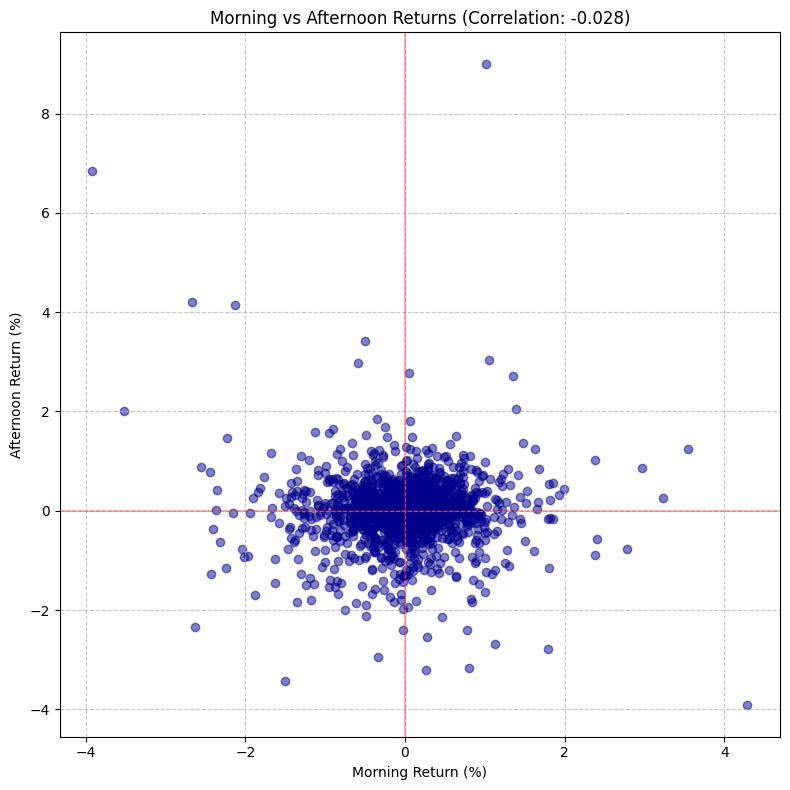

Morning-Afternoon Return Correlation: -0.028

Afternoon Direction Probability Given Morning Direction:


morning_direction
down    0.533007
up      0.548936
Name: afternoon_direction, dtype: float64

In [38]:
# here I would create a DataFrame with daily data
morning_afternoon = df.copy()
morning_afternoon['date'] = morning_afternoon.index.date

# then I would filter for market hours
morning = morning_afternoon.between_time('09:30', '12:30')
afternoon = morning_afternoon.between_time('12:30', '16:00')

# it would be important to calculate morning and afternoon returns for each day
morning_returns = morning.groupby('date')['close'].apply(
    lambda x: (x.iloc[-1] / x.iloc[0] - 1) * 100 if len(x) > 0 else None
)
afternoon_returns = afternoon.groupby('date')['close'].apply(
    lambda x: (x.iloc[-1] / x.iloc[0] - 1) * 100 if len(x) > 0 else None
)

# then latly I would combine into a DataFrame
daily_parts = pd.DataFrame({
    'morning_return': morning_returns,
    'afternoon_return': afternoon_returns
})
daily_parts.dropna(inplace=True)

# then calculate correlation
correlation = daily_parts['morning_return'].corr(daily_parts['afternoon_return'])

# here I would need to create scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(daily_parts['morning_return'], daily_parts['afternoon_return'], 
            alpha=0.5, color='darkblue')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='-', alpha=0.3)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f'Morning vs Afternoon Returns (Correlation: {correlation:.3f})')
plt.xlabel('Morning Return (%)')
plt.ylabel('Afternoon Return (%)')
plt.tight_layout()
plt.show()

# then with another round of calculation probabilities of afternoon direction based on morning direction
daily_parts['morning_direction'] = daily_parts['morning_return'].apply(
    lambda x: 'up' if x > 0 else 'down'
)
daily_parts['afternoon_direction'] = daily_parts['afternoon_return'].apply(
    lambda x: 'up' if x > 0 else 'down'
)

# then condition probabilities
continuation_prob = daily_parts.groupby('morning_direction')['afternoon_direction'].apply(
    lambda x: (x == x.iloc[0]).mean()
)

# here I would display statistics
print(f"Morning-Afternoon Return Correlation: {correlation:.3f}")
print("\nAfternoon Direction Probability Given Morning Direction:")
display(continuation_prob)

### 14. How do weekday patterns affect intraday performance?
Different days of the week often exhibit distinct trading patterns due to options expiration, economic releases, and institutional positioning. This analysis breaks down hourly returns by weekday to reveal which hours are most profitable on specific days. The heatmap visualization makes it easy to identify profitable trading windows that occur on particular weekdays. This is especially useful for traders developing day-specific strategies or those who only trade on certain days of the week.

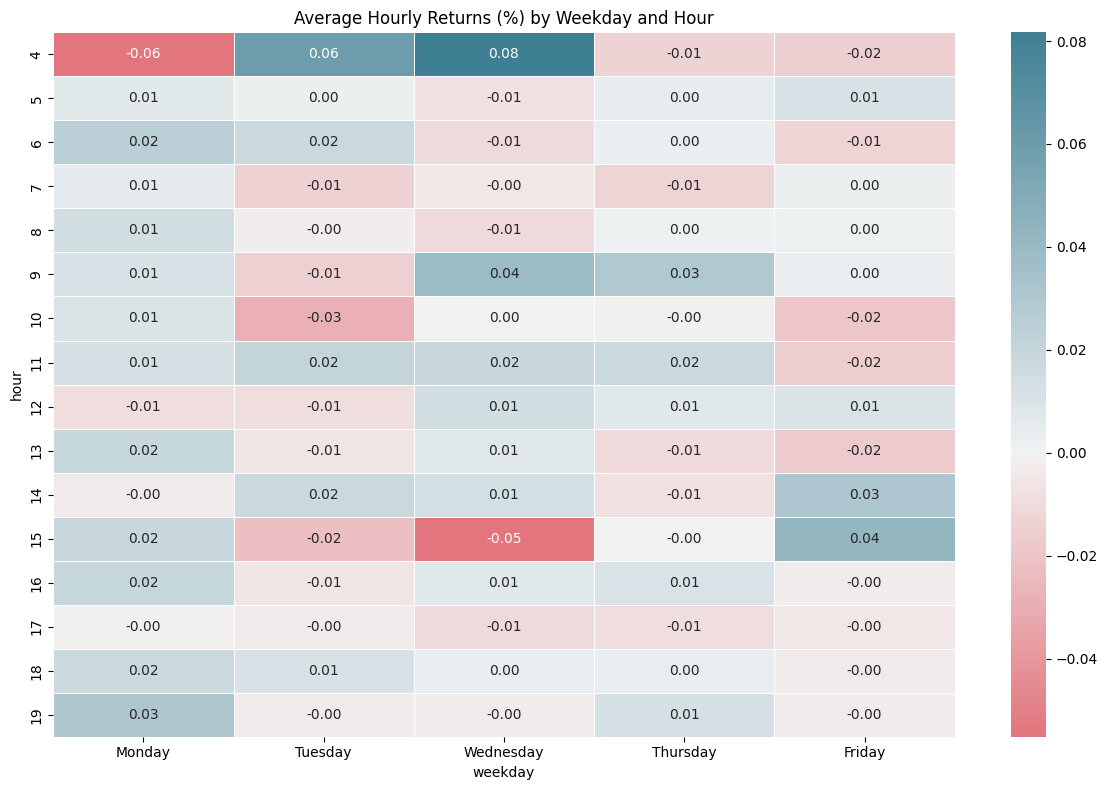

<Figure size 1000x600 with 0 Axes>

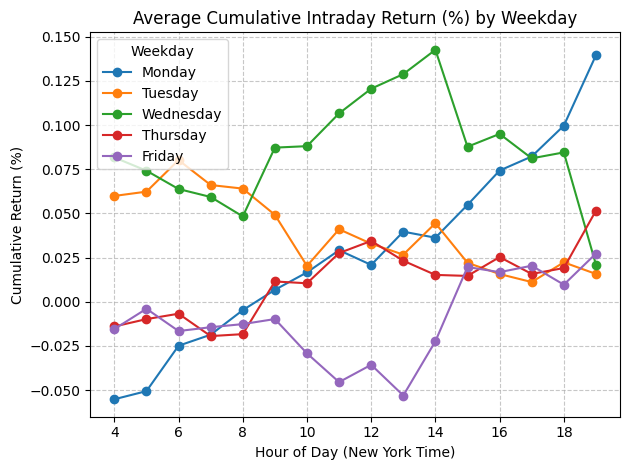

In [39]:
# here I would add weekday information to hourly data
hourly['weekday'] = hourly.index.day_name()
hourly['weekday_num'] = hourly.index.weekday

# then calculate average hourly return by weekday and hour
weekday_hour_returns = hourly.pivot_table(
    values='hourly_return',
    index='hour',
    columns='weekday',
    aggfunc='mean'
).reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# which in result weould need to plot heatmap of returns
plt.figure(figsize=(12, 8))
import seaborn as sns

# then I would create a masked version for better visualization
sns.heatmap(weekday_hour_returns, 
            cmap=sns.diverging_palette(10, 220, as_cmap=True),
            center=0,
            annot=True, 
            fmt=".2f", 
            linewidths=.5)
plt.title('Average Hourly Returns (%) by Weekday and Hour')
plt.tight_layout()
plt.show()

# here I would calculate cumulative intraday return by weekday
hourly['cumulative_day_return'] = hourly.groupby(['weekday', pd.Grouper(freq='D')])['hourly_return'].cumsum()

# then calculate average cumulative return path for each weekday
avg_cum_return = hourly.pivot_table(
    values='cumulative_day_return',
    index='hour',
    columns='weekday',
    aggfunc='mean'
).reindex(columns=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])

# lastly I would plot average cumulative return paths
plt.figure(figsize=(10, 6))
avg_cum_return.plot(marker='o')
plt.title('Average Cumulative Intraday Return (%) by Weekday')
plt.xlabel('Hour of Day (New York Time)')
plt.ylabel('Cumulative Return (%)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Weekday')
plt.tight_layout()
plt.show()

### 15. What is the mean reversion tendency of price action?
This question examines how extreme price movements tend to revert to the mean over different time horizons. By calculating z-scores relative to a rolling average, we can measure when price has moved too far too fast. The analysis shows the relationship between these deviations and subsequent returns over 30, 60, and 120-minute periods. This is particularly valuable for mean reversion traders who look to capitalize on overextended moves, helping identify the optimal timeframe to expect reversion after extreme readings.

<Figure size 1000x600 with 0 Axes>

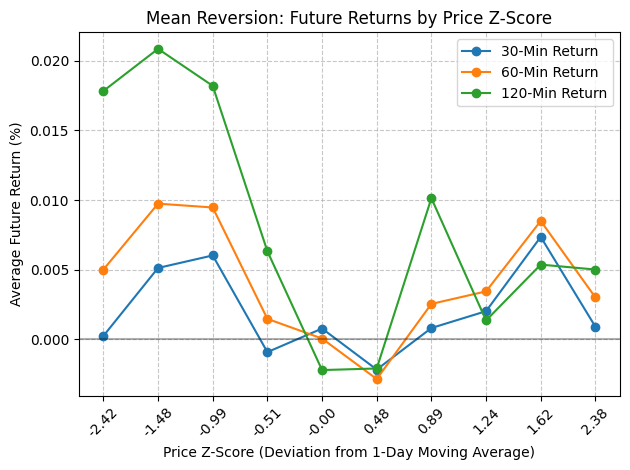

,future_return_30m,future_return_60m,future_return_120m,avg_z_score
z_bin,,,,
0,0.000,0.005,0.018,-2.421
1,0.005,0.010,0.021,-1.484
2,0.006,0.009,0.018,-0.992
3,-0.001,0.001,0.006,-0.515
4,0.001,0.000,-0.002,-0.001
5,-0.002,-0.003,-0.002,0.485
6,0.001,0.003,0.010,0.892
7,0.002,0.003,0.001,1.245
8,0.007,0.008,0.005,1.618


In [40]:
# here I would create a rolling Z-score of price to measure deviation from recent average
df['rolling_mean'] = df['close'].rolling(window=390).mean()  # 390 minutes = 1 trading day
df['rolling_std'] = df['close'].rolling(window=390).std()
df['z_score'] = (df['close'] - df['rolling_mean']) / df['rolling_std']
df.dropna(inplace=True)

# which in turn would need to group z-scores into bins
df['z_bin'] = pd.qcut(df['z_score'], 10, labels=False)

# and then calculate future returns (next 30 minutes, 60 minutes, 120 minutes)
df['return_30m'] = df['close'].pct_change(30) * 100
df['return_60m'] = df['close'].pct_change(60) * 100
df['return_120m'] = df['close'].pct_change(120) * 100

# which is why I would need to shift to align future returns with current z-score
df['future_return_30m'] = df['return_30m'].shift(-30)
df['future_return_60m'] = df['return_60m'].shift(-60)
df['future_return_120m'] = df['return_120m'].shift(-120)

# then I would group by z-score bin and calculate average future returns
mean_reversion = df.groupby('z_bin')[['future_return_30m', 'future_return_60m', 'future_return_120m']].mean()
mean_reversion['avg_z_score'] = df.groupby('z_bin')['z_score'].mean()
mean_reversion = mean_reversion.sort_values('avg_z_score')

# lastly I would plot mean reversion effect
plt.figure(figsize=(10, 6))
mean_reversion[['future_return_30m', 'future_return_60m', 'future_return_120m']].plot(marker='o')
plt.axhline(0, color='black', linestyle='-', alpha=0.3)
plt.title('Mean Reversion: Future Returns by Price Z-Score')
plt.xlabel('Price Z-Score (Deviation from 1-Day Moving Average)')
plt.ylabel('Average Future Return (%)')
plt.xticks(range(10), [f"{x:.2f}" for x in mean_reversion['avg_z_score']], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(['30-Min Return', '60-Min Return', '120-Min Return'])
plt.tight_layout()
plt.show()

# then display mean reversion data as table at the end/after of the plot 
display(mean_reversion.round(3))

### 16. How do first hour trading patterns affect the rest of the day? 
The opening hour often sets the tone for the entire trading day and contains significant information about institutional positioning. This analysis determines whether strong opens lead to trend continuation or reversal for the remainder of the session. By categorizing first-hour performance into strong/weak moves in either direction, traders can make more informed decisions about whether to hold positions throughout the day or take profits early. This is especially useful for traders who can only actively monitor the market during specific hours.

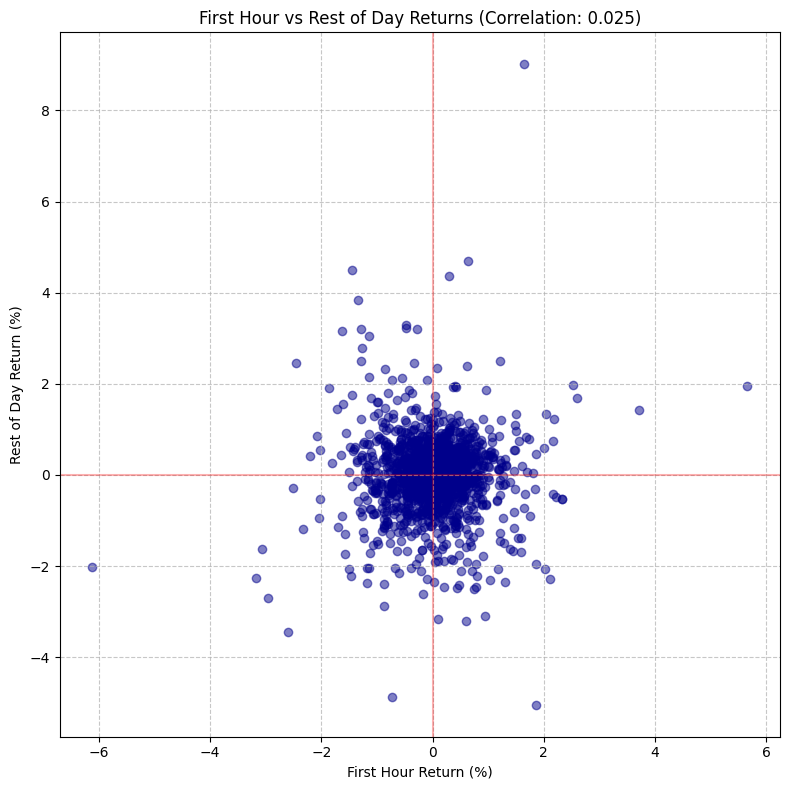

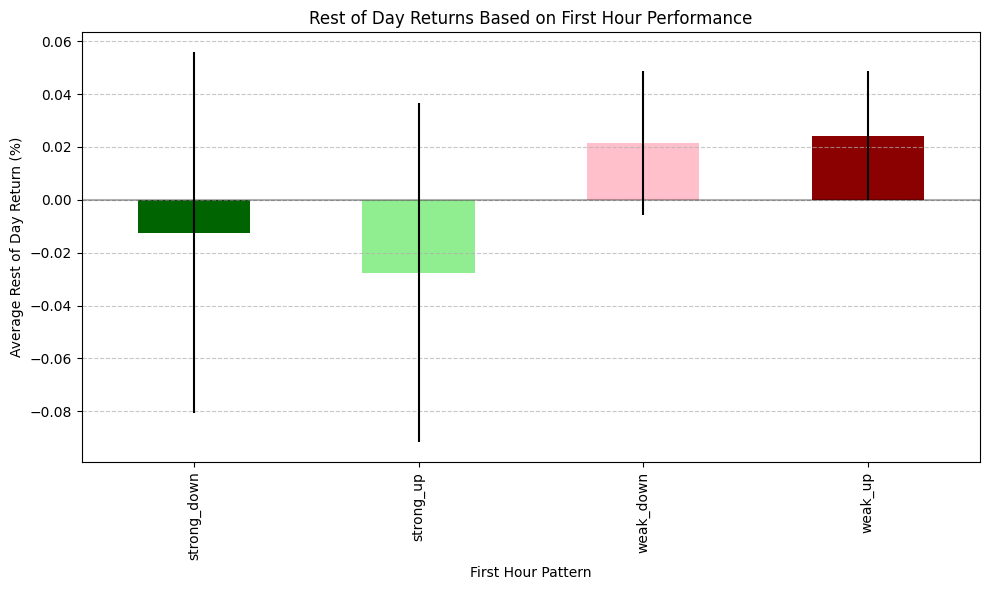

,mean,std,count,sem
first_hour_dir,,,,
strong_down,-0.012,1.128,272,0.068
strong_up,-0.028,1.088,287,0.064
weak_down,0.021,0.637,544,0.027
weak_up,0.024,0.625,654,0.024


In [41]:
# here I would create a DataFrame for analysis
first_hour = df.copy()
first_hour['date'] = first_hour.index.date
first_hour['time'] = first_hour.index.time

# then filter for first hour (9:30-10:30) and rest of day (10:30-16:00)
first_hour_data = first_hour[first_hour['time'] <= pd.to_datetime('10:30').time()]
rest_of_day = first_hour[
    (first_hour['time'] > pd.to_datetime('10:30').time()) & 
    (first_hour['time'] <= pd.to_datetime('16:00').time())
]

# as a result I would calculate returns for first hour and rest of day by date
first_hour_returns = first_hour_data.groupby('date').apply(
    lambda x: (x['close'].iloc[-1] / x['open'].iloc[0] - 1) * 100 if len(x) > 0 else None
)
rest_of_day_returns = rest_of_day.groupby('date').apply(
    lambda x: (x['close'].iloc[-1] / x['open'].iloc[0] - 1) * 100 if len(x) > 0 else None
)

# then combine into DataFrame
returns_df = pd.DataFrame({
    'first_hour': first_hour_returns,
    'rest_of_day': rest_of_day_returns
})
returns_df.dropna(inplace=True)

# which is why I calculate correlation
first_rest_corr = returns_df['first_hour'].corr(returns_df['rest_of_day'])

# then for the results I would create scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(returns_df['first_hour'], returns_df['rest_of_day'], 
            alpha=0.5, color='darkblue')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='-', alpha=0.3)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f'First Hour vs Rest of Day Returns (Correlation: {first_rest_corr:.3f})')
plt.xlabel('First Hour Return (%)')
plt.ylabel('Rest of Day Return (%)')
plt.tight_layout()
plt.show()

# then categorize first hour by direction and magnitude
returns_df['first_hour_dir'] = returns_df['first_hour'].apply(
    lambda x: 'strong_up' if x > 0.5 else 
              'weak_up' if x > 0 else 
              'weak_down' if x > -0.5 else 'strong_down'
)

# in half I would calculate average rest-of-day return grouped by first hour pattern
rest_of_day_by_first = returns_df.groupby('first_hour_dir')['rest_of_day'].agg(['mean', 'std', 'count'])
rest_of_day_by_first['sem'] = rest_of_day_by_first['std'] / np.sqrt(rest_of_day_by_first['count'])

# then lastly plot bar chart
plt.figure(figsize=(10, 6))
rest_of_day_by_first['mean'].plot(kind='bar', yerr=rest_of_day_by_first['sem'], 
                                   color=['darkgreen', 'lightgreen', 'pink', 'darkred'])
plt.axhline(0, color='black', linestyle='-', alpha=0.3)
plt.title('Rest of Day Returns Based on First Hour Performance')
plt.xlabel('First Hour Pattern')
plt.ylabel('Average Rest of Day Return (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# then at the bottom I would display statistics
display(rest_of_day_by_first.round(3))

### 17. What are the end-of-day momentum patterns?
This question investigates whether the final hour of trading (3:00-4:00 PM) has predictive power for the next day's returns. The last hour often reflects positioning ahead of overnight risk and can indicate institutional sentiment. Understanding if strong closes tend to carry momentum into the next session helps swing traders decide whether to hold overnight positions or close before the bell. The analysis categorizes last-hour performance and measures its impact on next-day returns, identifying potential edge for overnight strategies.

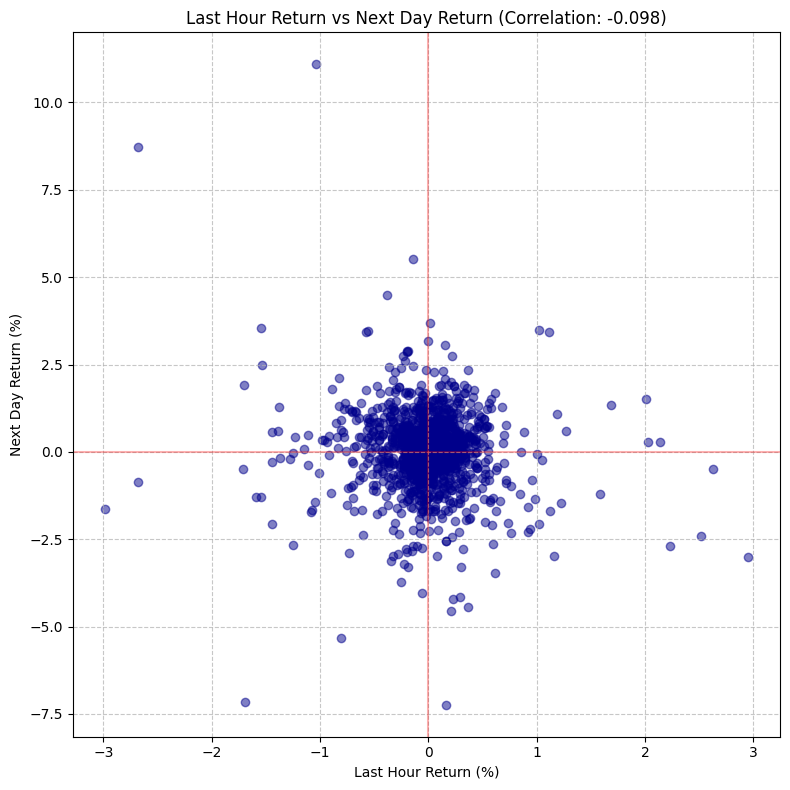

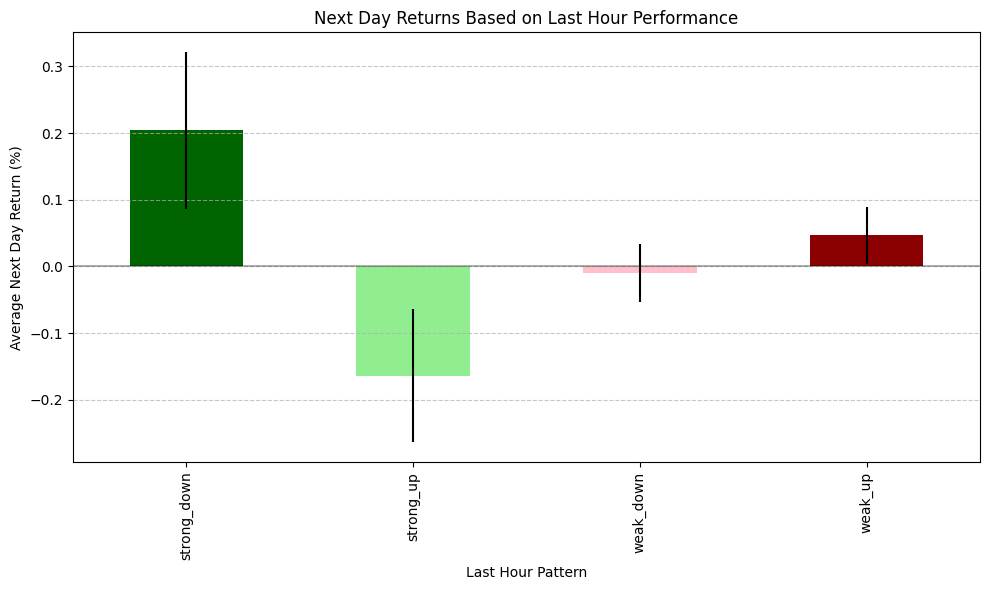

,mean,std,count,sem
last_hour_dir,,,,
strong_down,0.204,1.656,199,0.117
strong_up,-0.163,1.268,160,0.100
weak_down,-0.009,0.978,503,0.044
weak_up,0.047,0.968,510,0.043


In [48]:
# here I would need to ensure index is tz-naive by removing timezone info if present
df.index = df.index.tz_localize(None) if df.index.tz is not None else df.index

# then create a DataFrame for end-of-day analysis
eod = df.copy()
eod['date'] = eod.index.date
eod['time'] = eod.index.time

# after I would need to filter for last hour (15:00-16:00) and entire day
last_hour = eod[(eod['time'] >= pd.to_datetime('15:00').time()) & 
                (eod['time'] <= pd.to_datetime('16:00').time())]

# then calculate daily and last hour returns
daily_df = df.resample('1D').agg({'open': 'first', 'close': 'last'})
daily_df['daily_return'] = (daily_df['close'] / daily_df['open'] - 1) * 100
daily_df['next_day_return'] = daily_df['daily_return'].shift(-1)

last_hour_returns = last_hour.groupby('date').apply(
    lambda x: (x['close'].iloc[-1] / x['open'].iloc[0] - 1) * 100 if len(x) > 0 else None
)

# which is why I would combine into DataFrame
eod_df = pd.DataFrame({
    'last_hour_return': last_hour_returns,
    'next_day_return': daily_df['next_day_return']
})
eod_df.dropna(inplace=True)

# then calculate correlation
eod_corr = eod_df['last_hour_return'].corr(eod_df['next_day_return'])

# lassly create scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(eod_df['last_hour_return'], eod_df['next_day_return'], 
            alpha=0.5, color='darkblue')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='r', linestyle='-', alpha=0.3)
plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f'Last Hour Return vs Next Day Return (Correlation: {eod_corr:.3f})')
plt.xlabel('Last Hour Return (%)')
plt.ylabel('Next Day Return (%)')
plt.tight_layout()
plt.show()

# which inturn would mean to categorize last hour performance
eod_df['last_hour_dir'] = eod_df['last_hour_return'].apply(
    lambda x: 'strong_up' if x > 0.3 else 
              'weak_up' if x > 0 else 
              'weak_down' if x > -0.3 else 'strong_down'
)

# then calculate average next day return grouped by last hour pattern
next_day_by_last = eod_df.groupby('last_hour_dir')['next_day_return'].agg(['mean', 'std', 'count'])
next_day_by_last['sem'] = next_day_by_last['std'] / np.sqrt(next_day_by_last['count'])

# lastly plot bar chart
plt.figure(figsize=(10, 6))
next_day_by_last['mean'].plot(kind='bar', yerr=next_day_by_last['sem'], 
                              color=['darkgreen', 'lightgreen', 'pink', 'darkred'])
plt.axhline(0, color='black', linestyle='-', alpha=0.3)
plt.title('Next Day Returns Based on Last Hour Performance')
plt.xlabel('Last Hour Pattern')
plt.ylabel('Average Next Day Return (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# then display statistics at the bottom 
display(next_day_by_last.round(3))


### 18. What are the seasonal patterns in monthly returns?
Markets often display cyclical patterns tied to calendar months due to quarterly earnings, tax considerations, and institutional fund flows. This analysis identifies which months historically show the strongest and weakest returns. The heatmap visualization reveals yearly patterns while accounting for exceptional periods. This information is valuable for position traders and investors who can adjust exposure based on historical seasonal tendencies, potentially increasing allocations during historically strong months and reducing risk during typically weak periods.

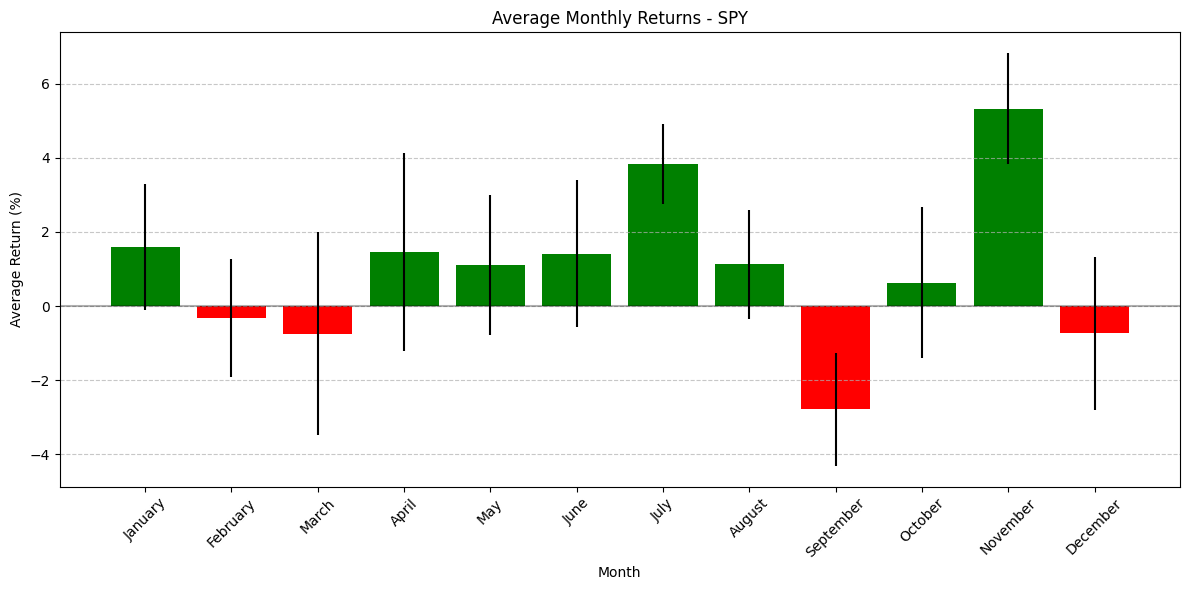

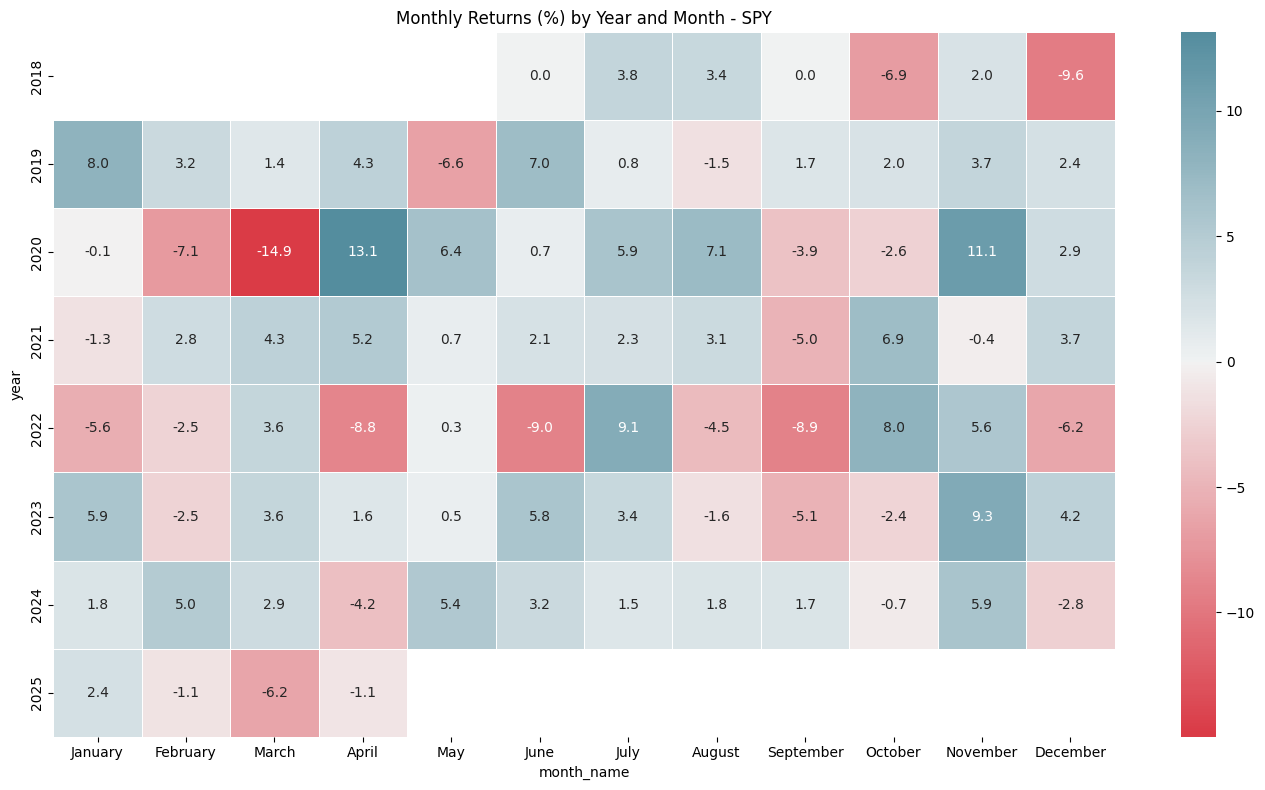

,monthly_return,std,count
month,,,
1,1.59,4.53,7
2,-0.32,4.23,7
3,-0.74,7.23,7
4,1.45,7.08,7
5,1.11,4.63,6
6,1.41,5.24,7
7,3.82,2.85,7
8,1.13,3.90,7
9,-2.79,4.04,7


In [49]:
# here we would create monthly returns
monthly_returns = df['close'].resample('M').last().pct_change() * 100
monthly_returns = monthly_returns.dropna()

# then add month information
monthly_df = pd.DataFrame(monthly_returns)
monthly_df.columns = ['monthly_return']
monthly_df['year'] = monthly_df.index.year
monthly_df['month'] = monthly_df.index.month
monthly_df['month_name'] = monthly_df.index.month_name()

# which is why I calculate average return by month
month_avg = monthly_df.groupby('month')[['monthly_return']].mean()
month_avg['std'] = monthly_df.groupby('month')['monthly_return'].std()
month_avg['count'] = monthly_df.groupby('month')['monthly_return'].count()
month_avg['sem'] = month_avg['std'] / np.sqrt(month_avg['count'])
month_avg['month_name'] = [pd.to_datetime(str(i), format='%m').month_name() for i in month_avg.index]

# then cort by month order
month_avg = month_avg.sort_index()

# lastly plot average monthly returns
plt.figure(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in month_avg['monthly_return']]
plt.bar(month_avg['month_name'], month_avg['monthly_return'], yerr=month_avg['sem'], color=colors)
plt.axhline(0, color='black', linestyle='-', alpha=0.3)
plt.title('Average Monthly Returns - SPY')
plt.xlabel('Month')
plt.ylabel('Average Return (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# after I would create a heatmap of monthly returns by year
pivot_returns = monthly_df.pivot_table(
    values='monthly_return',
    index='year',
    columns='month_name',
    aggfunc='sum'
)

# to reorder columns to calendar order
calendar_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                  'July', 'August', 'September', 'October', 'November', 'December']
pivot_returns = pivot_returns.reindex(columns=calendar_order)

# and then create heatmap again 
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_returns, cmap=sns.diverging_palette(10, 220, as_cmap=True),
            center=0, annot=True, fmt=".1f", linewidths=.5)
plt.title('Monthly Returns (%) by Year and Month - SPY')
plt.tight_layout()
plt.show()

# lastly I would display monthly statistics at the end 
display(month_avg[['monthly_return', 'std', 'count']].round(2))

## Conclusion
By using Python and the Pandas/MatPlotlib data analysis libraries, large datasets such as the S&P500 can be quickly and automatically analyzed for extremely insightful information. SPY (S&P500 ETF) data 1 minute OHLC data pulled from Databento containing dates 05/01/2018 to 04/28/2025 was analyzed. This project focused on studying S&P500 volatility, candle behavior, gap statistics, and trend strength across different trading hours and weekdays.
Key Findings:

Higher volatility and Larger candle ranges with the best being 10AM - 11AM, then 3PM - 4PM, and lastly, 9AM - 10AM.
Overnight gaps can provide an edge, and have an extremely high success rate on Tuesdays, Wednesdays, and Thursdays over 2018 to 2025.
Momentum effects between consecutive hours reveal periods where prior hour performance significantly influences subsequent returns, creating exploitable patterns for short-term traders.
Volume analysis demonstrates a distinct U-shaped pattern with peaks at market open and close, with a significant drop during lunch hours, confirming the classic trading wisdom of avoiding low-liquidity periods.
Morning performance has a measurable correlation with afternoon returns, allowing traders to make more informed decisions about holding positions through midday transition periods.
Weekday patterns show distinct hour-by-hour return profiles, with certain weekday/hour combinations consistently outperforming others, which can be leveraged for day-specific trading strategies.
Mean reversion tendencies are strongest after extreme price deviations, particularly in the 60-120 minute timeframe, providing clear entry signals for counter-trend traders.
First hour trading patterns carry predictive power for the rest of the session, with strong directional moves often indicating continued momentum throughout the day.
End-of-day price action demonstrates measurable influence on next-day returns, creating opportunities for overnight positioning strategies based on closing strength or weakness.
Monthly seasonality confirms the existence of traditionally strong and weak months, with patterns that have persisted through various market environments from 2018-2025.

These insights can help traders better time their entries, anticipate volatility, and understand the likelihood of price behaviors like gap fills. Additionally, these findings have confirmed/validated common trading assumptions and can help other traders develop strategies in a quantified manner. The comprehensive statistical analysis provides an objective foundation for trading decisions, moving beyond subjective interpretations to data-driven approaches that can be systematically tested and refined. By understanding these market microstructure patterns, traders can align their activity with natural market rhythms, potentially improving execution, reducing transaction costs, and identifying the most favorable time windows for specific trading styles.

Next Steps:
- Analyze more data such as bullish / bearish days
- Expand analysis / create a tool for automatic analysis of other tickers
- Automate strategy testing

Social Media:
- http://instagram.com/ericfengg
- https://www.youtube.com/@ericfengg/featured

### References
- https://databento.com/ 
- https://www.ssga.com/us/en/intermediary/insights/how-spy-reinvented-investing-story-of-first-us-etf